In [43]:
# Imported the necessary librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coffee Production Stats

* Created a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Also changed the xticks to two letter country abbreviations.


In [44]:
coffee_production = pd.read_csv("C:/Jupyter/total-production.csv").T # Transposed the table
coffee_production.columns = coffee_production.iloc[0]  # Set the column names to equal coffee productions
coffee_production = coffee_production.drop("total_production")  # Dropped the first row of data

coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [45]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [46]:
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]  # Sorted in descending order and included the top 10

top10_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

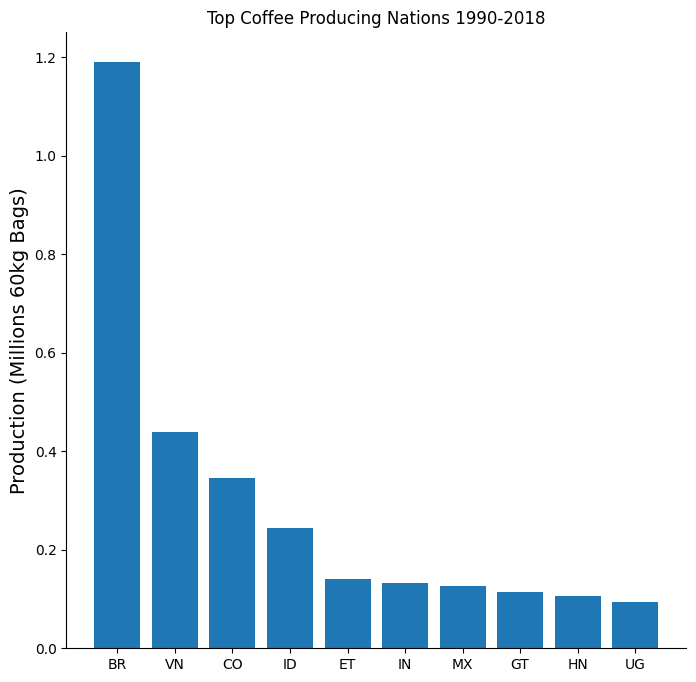

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(x=top10_producers.index, height=top10_producers / 1000000)

# Created range of integers and attached labels to those integers
positions = list(range(10))
labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

# Set the title and y label
ax.set_title("Top Coffee Producing Nations 1990-2018")
ax.set_ylabel("Production (Millions 60kg Bags)", fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(labels)

# Turned off top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# Top 5 over time

* Created a line chart with the top 5 nations over time.de sure to include a legend.

In [48]:
top5 = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]  # Grabbed 5 columns from dataframe
top5.index = top5.index.astype("datetime64[ns]")  # Casted as an index

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


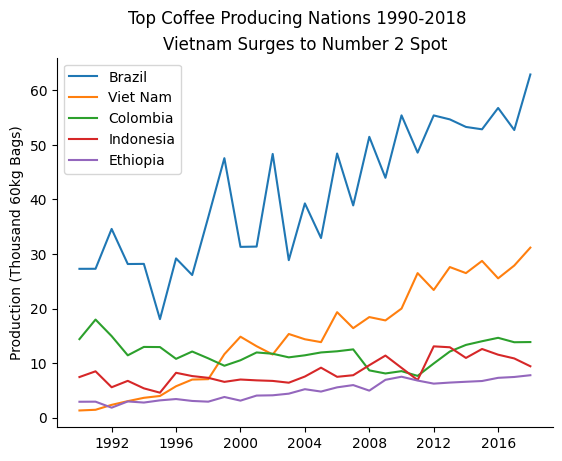

In [49]:
fig, ax = plt.subplots()

# Created 5 line plots
ax.plot(top5.index, coffee_production["Brazil"] / 1000, label="Brazil")
ax.plot(top5.index, coffee_production["Viet Nam"] / 1000, label="Viet Nam")
ax.plot(top5.index, coffee_production["Colombia"] / 1000, label="Colombia")
ax.plot(top5.index, coffee_production["Indonesia"] / 1000, label="Indonesia")
ax.plot(top5.index, coffee_production["Ethiopia"] / 1000, label="Ethiopia")

# Set the main title of figure
fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Vietnam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")  # Set the y label

# Hid the top and right borders for a better visualization
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()  # Added a legend to differentiate the countries
plt.show()

# COMPOSITION OVER TIME

The client is interested in looking at how Brazil's share of global coffee production has changed over time.

In [50]:
# Created a DataFrame to compare Brazil's coffee production with the rest of the world
brazil_vs_others = (coffee_production
                    # Calculates the total production of all countries except Brazil
                    .assign(rest_of_world=coffee_production
                            .drop("Brazil", axis=1)  # Dropped Brazil's column
                            .sum(axis=1))            # Sums the production across remaining countries
                    # Keeps only Brazil and the newly created 'rest_of_world' column
                    .loc[:, ["Brazil", "rest_of_world"]]
                    # Ensures Brazil's production values are stored as float64
                    .astype({"Brazil": "float64"})
                   )
brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147
1995,18060.2022,69257.256
1996,29196.7430,74105.853
1997,26148.0040,73713.195
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902


## PRICE RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Built a scatterplot comparing Brazil Vs. Vietnam Production and one comparing Brazil to Venezuela.

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

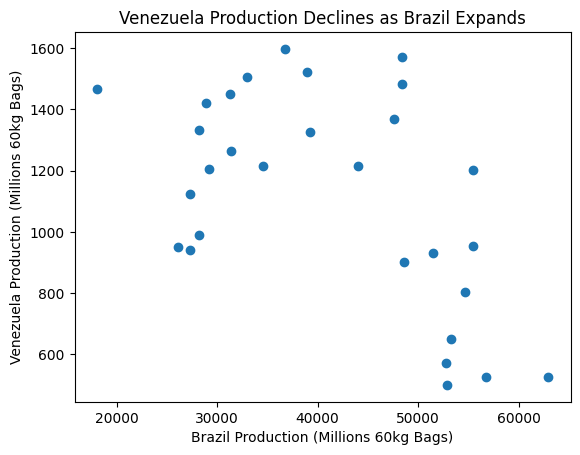

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Created a scatter plot to visualize the relationship between Brazil's and Venezuela's coffee production over time
ax.scatter(
    coffee_production["Brazil"],   # Brazil's coffee production (x-axis)
    coffee_production["Venezuela"] # Venezuela's coffee production (y-axis)
)

ax.set_title("Venezuela Production Declines as Brazil Expands")
ax.set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

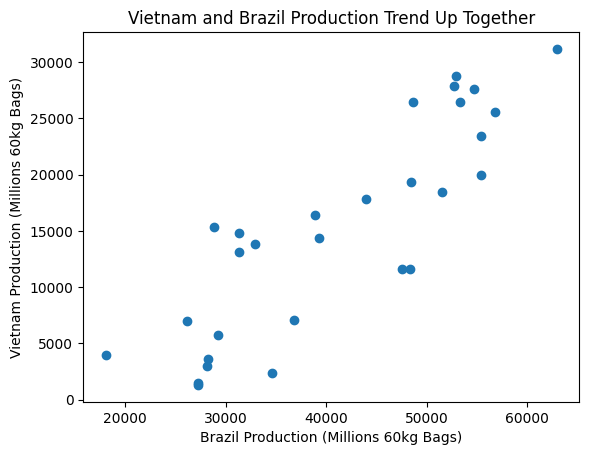

In [29]:
fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"], 
    coffee_production["Viet Nam"], 
)

ax.set_title("Vietnam and Brazil Production Trend Up Together")
ax.set_ylabel("Vietnam Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

# COMPOSITION OF COFFEE PRODUCTION

* Created a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Created two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [30]:
# Calculates the total coffee production for all countries except the top 5 producers
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",], axis=1).sum(axis=1)  # Sums the remaining countries production

# Extracts the coffee production data for 2018, including the top 5 producers and the rest of the world
coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: object

Text(0.5, 0.98, 'Share of Global Coffee Production 2018')

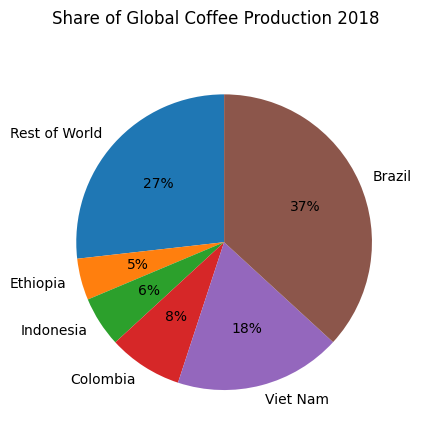

In [31]:
fig, ax = plt.subplots()

# Creates a pie chart to visualize the share of global coffee production in 2018
ax.pie(coffee_production_top5_2018[::-1],  # Reverses the order of values for better visualization
       autopct="%.0f%%",  # Displays percentage values on the pie chart
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90  # Rotates the chart to start from the top
      )

fig.suptitle("Share of Global Coffee Production 2018")

In [32]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,105831.74
1991,27293.4934,117110.277
1992,34603.3542,103163.116
1993,28166.9786,103042.356
1994,28192.0470,105516.077
1995,18060.2022,113867.657
1996,29196.7430,120052.349
1997,26148.0040,117647.31
1998,36760.8533,116119.3556
1999,47577.8065,136127.7035


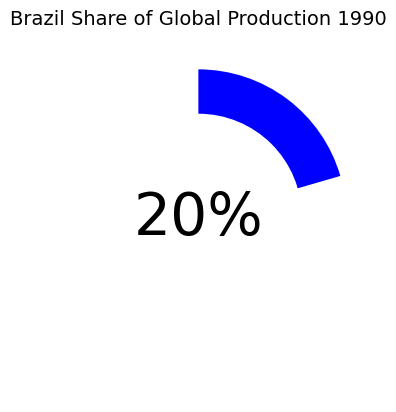

In [34]:
fig, ax = plt.subplots()

# Create a pie chart to visualize Brazil's share of global coffee production in 1990
ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,  # Rotates the chart to start from the top
    labels = ["", ""],  # Hides default labels to customize later
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]  # Uses white and blue for visual contrast
)

# Creates a white circular shape to place in the center, making a donut chart
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adds a circular hole to the pie chart
fig.gca().add_artist(hole)

# Adds a large percentage label in the center of the donut chart
plt.text(
    0, # X coordinate
    0, # Y coordinate
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', # Horizontally aligns text in center
    va='center', # Vertically aligns text in center
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

plt.show()

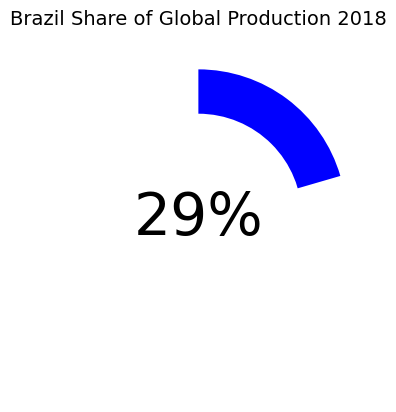

In [41]:
ig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 2018", fontsize=14)

plt.show()

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plotted a dual axis bar chart of price vs consumption totals for these countries.

In [36]:
consumption = pd.read_csv("C:/Jupyter/imports.csv").set_index("imports").mean(axis=1)

consumption.name = "imports"

consumption.head()

imports
Austria               1551.083333
Belgium               4639.533333
Belgium/Luxembourg    2329.444444
Bulgaria               397.250000
Croatia                349.136364
Name: imports, dtype: float64

In [37]:
prices = pd.read_csv("C:/Jupyter/retail-prices.csv").set_index("retail_prices").mean(axis=1)


prices.head()

retail_prices
Austria    11.571135
Cyprus     10.437695
Denmark    10.494025
Finland     7.211692
France      6.850879
dtype: float64

In [38]:
# Merges the 'prices' DataFrame with the 'consumption' DataFrame on their indices
# Only the rows with matching indices are kept ('how="inner"')
price_cons = (pd.DataFrame(prices)
              .merge(consumption, 
                    left_on=prices.index, # Use the index of 'prices' for the left join
                    right_on=consumption.index, # Use the index of 'consumption' for the right join
                    how="inner"
            )
           .sort_values(["imports"], ascending=False)  # Sorts the resulting DataFrame by the 'imports' column in descending order
)

# Renames columns for clarity
price_cons.columns= ["country", "Price", "Imports"]

# Strips any leading or trailing whitespace characters from the 'country' column
price_cons["country"] = price_cons["country"].str.strip(" ")

price_cons

,country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


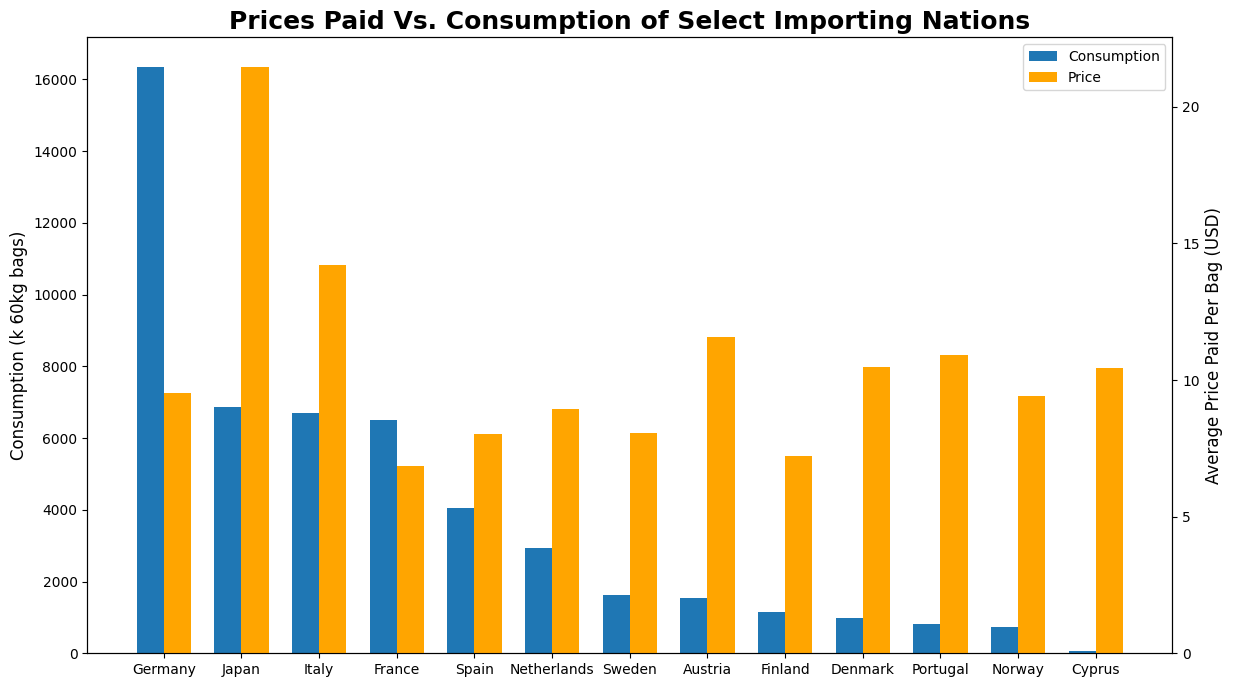

In [40]:
fig, ax = plt.subplots(figsize=(14, 8))

width=.35
x=np.arange(0, len(price_cons["country"]))  # Creates an array of x positions for each bar

bar1 = ax.bar(x-width/2, price_cons["Imports"], width=width)  # Creates the first bar chart for "Consumption"

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)

# Creates a second y-axis for the price data (this allows two different scales)
ax2 = ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons["Price"], width=width, color="orange")  # Creates the second bar chart for "Price" using a different color (orange)
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)


plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"])

plt.show()